<a href="https://colab.research.google.com/github/mngugi/Code_3_Camp/blob/main/CNN_Using_Sequencial_and_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the libraries

In [7]:
#data manipulation libraries
import numpy as np
import random

#data visualization library
import matplotlib.pyplot as plt

#model building libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, BatchNormalization, Reshape


###Importing the dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing training and testing data
#import numpy as np
#x_train = np.loadtxt('/content/input.csv', delimiter = ',')
#x_test = np.loadtxt('/content/input_test.csv', delimiter = ',')

#x_train = np.loadtxt('/content/input.csv', delimiter=',', usecols=range(30000))
#x_test = np.loadtxt('/content/input_test.csv', delimiter=',', usecols=range(30000))

import pandas as pd

# Read CSV file into a pandas DataFrame
x_train = pd.read_csv('/content/input.csv', delimiter=',')
x_test = pd.read_csv('/content/input_test.csv', delimiter=',')




In [4]:
#importing training and test label
y_train = np.loadtxt('/content/labels.csv', delimiter = ',')
y_test = np.loadtxt('/content/labels_test.csv', delimiter = ',')


###Checking the shape of the dataset

In [5]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

shape of x_train : (13, 30000)
shape of x_test : (15, 30000)
shape of y_train : (2000,)
shape of y_test : (2000,)


- There are 2000 images in the training set.
- Each samle is a flattened array of 30000 values.
- The test set has 400 images.

###Reshaping the dataset into an appropriate shape

In [10]:
100 * 100 * 3

30000

In [11]:
#reshaping the train and test images
#x_train = x_train.reshape(len(x_train), 100,100, 3)
#x_test = x_test.reshape(len(x_test), 100,100, 3)
import numpy as np

# Assuming x_train and x_test are DataFrames
# Convert them to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Now you can reshape the arrays
x_train = x_train.reshape(len(x_train), 100, 100, 3)
x_test = x_test.reshape(len(x_test), 100, 100, 3)


In [ ]:
#reshaping the labels
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

**Checking the shape of the dataset again**

In [ ]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

shape of x_train : (2000, 100, 100, 3)
shape of x_test : (400, 100, 100, 3)
shape of y_train : (2000, 1)
shape of y_test : (2000, 1)


- The shape has been fixed

###Rescaling the dataset

In [12]:
#checking the scale
x_train[1]

array([[[80.0, 92.0, 88.0],
        [83.0, 96.0, 89.0],
        [76.0, 92.0, 82.0],
        ...,
        [14.0, 35.0, 20.0],
        [14.0, 35.0, 20.0],
        [20.0, 41.0, 26.0]],

       [[78.0, 87.0, 84.0],
        [90.0, 101.0, 95.0],
        [79.0, 90.0, 82.0],
        ...,
        [37.0, 54.0, 38.0],
        [31.0, 48.0, 32.0],
        [13.0, 30.0, 14.0]],

       [[64.0, 66.0, 63.0],
        [80.0, 85.0, 79.0],
        [93.0, 100.0, 92.0],
        ...,
        [40.0, 46.0, 32.0],
        [40.0, 48.0, 33.0],
        [14.0, 22.0, 7.0]],

       ...,

       [[100.0, 109.0, 92.0],
        [93.0, 106.0, 86.0],
        [90.0, 110.0, 85.0],
        ...,
        [172.0, 167.0, 148.0],
        [161.0, 156.0, 137.0],
        [145.0, 140.0, 121.0]],

       [[99.0, 110.0, 93.0],
        [96.0, 109.0, 89.0],
        [92.0, 112.0, 87.0],
        ...,
        [150.0, 145.0, 126.0],
        [133.0, 128.0, 108.0],
        [146.0, 141.0, 121.0]],

       [[106.0, 117.0, 100.0],
        [102.0,

- The images are ranging from 1 to 255, they should range from 0 to 1

In [15]:
#rescaling the dataset
#x_train = x_train/255.0
#x_test = x_test/255.0
import numpy as np

# Convert x_train and x_test to NumPy arrays if they are not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Check data types
print("Data type of x_train:", x_train.dtype)
print("Data type of x_test:", x_test.dtype)

# Check for non-numeric values
non_numeric_x_train = x_train[np.logical_not(np.issubdtype(x_train.dtype, np.number))]
non_numeric_x_test = x_test[np.logical_not(np.issubdtype(x_test.dtype, np.number))]

if non_numeric_x_train.size > 0 or non_numeric_x_test.size > 0:
    print("Non-numeric values found in x_train:", non_numeric_x_train)
    print("Non-numeric values found in x_test:", non_numeric_x_test)
    # Handle or remove non-numeric values as needed
else:
    # Data appears to be numeric, proceed with rescaling
    x_train = x_train / 255.0
    x_test = x_test / 255.0


Data type of x_train: object
Data type of x_test: object
Non-numeric values found in x_train: [[[[[131.0 128.0 135.0]
    [160.0 157.0 164.0]
    [198.0 192.0 204.0]
    ...
    [250.0 249.0 247.0]
    [255.0 255.0 253.0]
    [250.0 249.0 245.0]]

   [[140.0 137.0 144.0]
    [127.0 124.0 131.0]
    [120.0 114.0 124.0]
    ...
    [251.0 253.0 252.0]
    [254.0 255.0 253.0]
    [254.0 255.0 251.0]]

   [[204.0 202.0 207.0]
    [187.0 185.0 190.0]
    [147.0 142.0 148.0]
    ...
    [249.0 255.0 255.0]
    [238.0 247.0 242.0]
    [232.0 241.0 236.0]]

   ...

   [[174.0 182.0 195.0]
    [172.0 180.0 193.0]
    [178.0 186.0 197.0]
    ...
    [87.0 114.0 97.0]
    [75.0 99.0 83.0]
    [80.0 105.0 86.0]]

   [[166.0 173.0 189.0]
    [164.0 172.0 185.0]
    [172.0 180.0 193.0]
    ...
    [78.0 106.0 84.0]
    [72.0 97.0 76.0]
    [77.0 102.0 81.0]]

   [[173.0 180.0 196.0]
    [172.0 179.0 195.0]
    [174.0 182.0 195.0]
    ...
    [63.0 91.0 69.0]
    [62.0 87.0 65.0]
    [71.0 96.0 74.0]

In [16]:
#checking the scale
x_train[1]

array([[[80.0, 92.0, 88.0],
        [83.0, 96.0, 89.0],
        [76.0, 92.0, 82.0],
        ...,
        [14.0, 35.0, 20.0],
        [14.0, 35.0, 20.0],
        [20.0, 41.0, 26.0]],

       [[78.0, 87.0, 84.0],
        [90.0, 101.0, 95.0],
        [79.0, 90.0, 82.0],
        ...,
        [37.0, 54.0, 38.0],
        [31.0, 48.0, 32.0],
        [13.0, 30.0, 14.0]],

       [[64.0, 66.0, 63.0],
        [80.0, 85.0, 79.0],
        [93.0, 100.0, 92.0],
        ...,
        [40.0, 46.0, 32.0],
        [40.0, 48.0, 33.0],
        [14.0, 22.0, 7.0]],

       ...,

       [[100.0, 109.0, 92.0],
        [93.0, 106.0, 86.0],
        [90.0, 110.0, 85.0],
        ...,
        [172.0, 167.0, 148.0],
        [161.0, 156.0, 137.0],
        [145.0, 140.0, 121.0]],

       [[99.0, 110.0, 93.0],
        [96.0, 109.0, 89.0],
        [92.0, 112.0, 87.0],
        ...,
        [150.0, 145.0, 126.0],
        [133.0, 128.0, 108.0],
        [146.0, 141.0, 121.0]],

       [[106.0, 117.0, 100.0],
        [102.0,

- The scale of the images has changed

###Displaying one image

Data type of x_train: object
Shape of x_train: (13, 100, 100, 3)


TypeError: Image data of dtype object cannot be converted to float

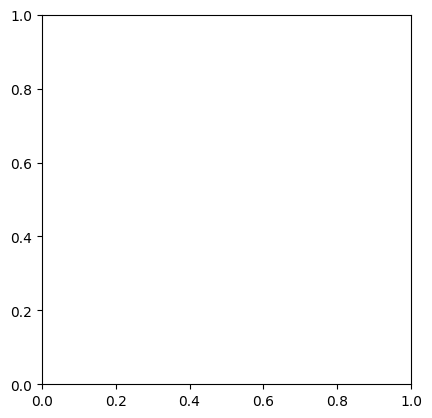

In [19]:
#dispalying any random image
#randomimage = random.randint(0, len(x_train))
#plotting the image
#plt.imshow(x_train[randomimage, :])
#plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Convert x_train to NumPy array if it's not already
x_train = np.array(x_train)

# Check the data type and shape
print("Data type of x_train:", x_train.dtype)
print("Shape of x_train:", x_train.shape)

# Ensure the images are represented as numerical arrays
# Assuming each image is represented as a 2D array (grayscale) or 3D array (RGB)
# If the images are not in the correct shape or dtype, you may need to preprocess them accordingly

# Plot a random image
random_image_index = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_image_index])
plt.show()



- As shown, a cat is displayed

##MODEL BUILDING

###Sequencial model/Sequential API
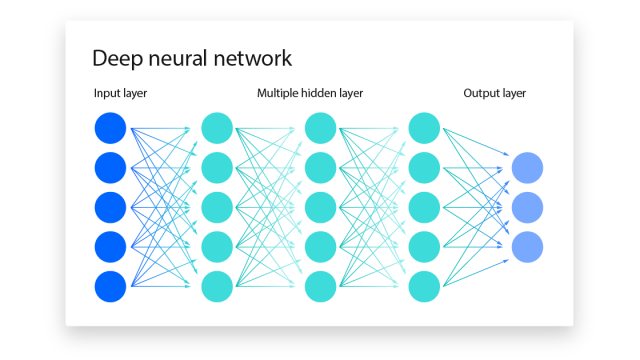

In [20]:
sq_model = Sequential([
    Conv2D(32, 3,3, activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, 3,3, activation = 'relu'),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

sq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 33, 33, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [ ]:
from tensorflow.keras import layers

In [ ]:
sq1 = Sequential()
sq1.add(layers.Conv2D(32, 3,3, activation = 'relu', input_shape = (100,100,3))),
sq1.add(layers.MaxPooling2D((2,2))),
sq1.add(layers.Conv2D(32, 3,3, activation = 'relu')),
sq1.add(layers.Flatten()),
sq1.add(layers.Dense(1, activation = 'sigmoid'))

**Compiling the model**

In [ ]:
#compiling the model
sq_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#fitting the model
sq_model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/10
63/63 [==============================] - 5s 9ms/step - loss: 0.6940 - accuracy: 0.5155
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5465
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.5630
Epoch 4/10
63/63 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.5770
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 0.6567 - accuracy: 0.6090
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 0.6409 - accuracy: 0.6355
Epoch 7/10
63/63 [==============================] - 1s 8ms/step - loss: 0.6239 - accuracy: 0.6550
Epoch 8/10
63/63 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6755
Epoch 9/10
63/63 [==============================] - 0s 8ms/step - loss: 0.5851 - accuracy: 0.6945
Epoch 10/10
63/63 [==============================] - 0s 8ms/step - loss: 0.5685 - accuracy: 0.7140


In [ ]:
sq_model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.6775


[0.6031834483146667, 0.6775000095367432]

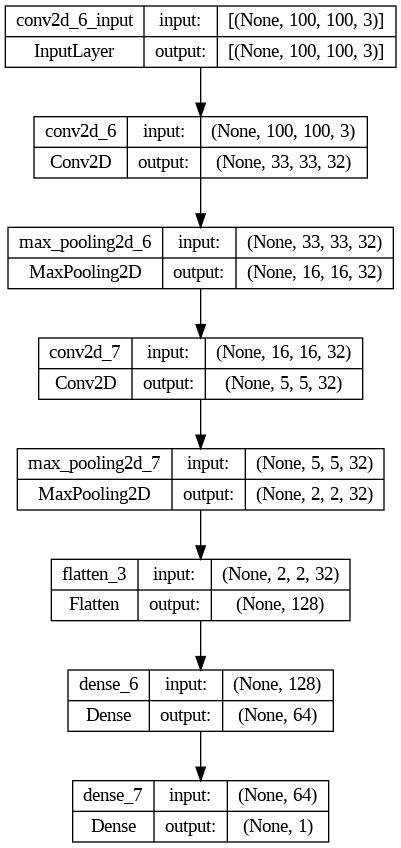

In [ ]:
keras.utils.plot_model(sq_model, 'model.png', show_shapes = True)

###Functional API model

In [21]:
#creating the functional API model

input_layer = Input(shape=(100, 100, 3))
conv_layer1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pooling_layer1 = MaxPooling2D((2, 2))(conv_layer1)
conv_layer2 = Conv2D(32, (3, 3), activation='relu')(pooling_layer1)
pooling_layer2 = MaxPooling2D((2, 2))(conv_layer2)
flatten_layer = Flatten()(pooling_layer2)
dense_layer1 = Dense(64, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer1)

model = Model(inputs=input_layer, outputs=output_layer)

In [22]:
#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'] )



In [23]:
#fitting the model
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
#testing the model on test set
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 5ms/step - loss: 1.0787 - accuracy: 0.6725


[1.0786513090133667, 0.6725000143051147]

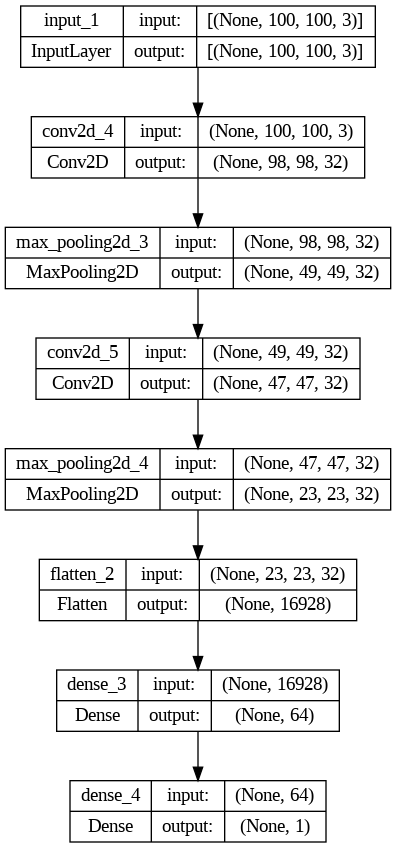

In [ ]:
keras.utils.plot_model(model, 'model.png',show_shapes = True)